### **Data Science Project Introduction: Air Quality Analysis in Madrid**

#### **Problem Statement:** 
The project aims to conduct an extensive analysis of air quality in Madrid using a dataset collected from the Escuelas Aguirre air quality station. The primary focus is to understand the trends, patterns, and potential correlations among various pollutants in the atmosphere.

#### **Objectives:** 
1. **Comprehensive Analysis:** To analyze and interpret the hourly air quality data collected from January 2001 to March 2022.
2. **Insight Generation:** To derive valuable insights regarding the levels of different pollutants present in Madrid's atmosphere over two decades.
3. **Modeling and Visualization:** To employ data science techniques to model pollutant levels and create meaningful visualizations that aid in understanding the air quality dynamics.

#### **About Dataset:**
- **Description:** 172,622 rows of data from the Escuelas Aguirre air quality station, Madrid. The data span from January 2001 to March 2022 and include the following variables:
  - BEN Benzene (µg/m³)
  - CH4 Methane (mg/m³)
  - CO Carbon monoxide (mg/m³)
  - EBE Ethylbenzene (µg/m³)
  - NMHC Non-methane hydrocarbons (mg/m³) 
  - NO Nitrogen monoxide (µg/m³)
  - NO2 Nitrogen dioxide (µg/m³)
  - NOx Nitrogen oxides (µg/m³)
  - O3 Ozone (µg/m³)
  - PM10 Particles < 10 µm (µg/m³)
  - PM25 Particles < 2.5 µm (µg/m³) 
  - SO2 Sulfur dioxide (µg/m³)
  - TCH Total hydrocarbons (mg/m³)
  - TOL Toluene (µg/m³)
- **Context:** This dataset represents a comprehensive hourly record of pollution levels in Madrid.

#### **Team Members:**
- Turki Alkazman - (220010077)
- Turki Alqou - (220011703)

#### **Context and Insights Aimed:**
- Contextualizing variations in pollutant levels over a 21-year period.
- Identifying potential correlations between different pollutants.
- Exploring seasonal patterns and their impact on air quality.
- Uncovering long-term trends to better comprehend Madrid's environmental conditions.
- Employing machine learning techniques to model and predict pollutant levels, if applicable and beneficial for the analysis.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data\MadridPolution2001-2022.csv")

df.shape

(172622, 15)

In [2]:
df.head(10)

,Time,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
0,2001-01-01 00:00:00+00:00,4.0,NaN,0.0,2.0,NaN,66.0,67.0,168.0,7.0,32.0,NaN,26.0,NaN,11.0
1,2001-01-01 01:00:00+00:00,9.0,NaN,0.0,5.0,NaN,146.0,71.0,294.0,7.0,41.0,NaN,21.0,NaN,21.0
2,2001-01-01 02:00:00+00:00,9.0,NaN,0.0,5.0,NaN,190.0,73.0,364.0,7.0,50.0,NaN,22.0,NaN,24.0
3,2001-01-01 03:00:00+00:00,10.0,NaN,0.0,5.0,NaN,170.0,75.0,335.0,7.0,55.0,NaN,19.0,NaN,25.0
4,2001-01-01 04:00:00+00:00,8.0,NaN,0.0,4.0,NaN,102.0,67.0,224.0,8.0,42.0,NaN,14.0,NaN,21.0
5,2001-01-01 05:00:00+00:00,3.0,NaN,1.0,2.0,NaN,63.0,60.0,157.0,8.0,21.0,NaN,10.0,NaN,10.0
6,2001-01-01 06:00:00+00:00,2.0,NaN,0.0,1.0,NaN,28.0,47.0,90.0,17.0,14.0,NaN,8.0,NaN,6.0
7,2001-01-01 07:00:00+00:00,2.0,NaN,1.0,1.0,NaN,33.0,43.0,93.0,21.0,13.0,NaN,8.0,NaN,6.0
8,2001-01-01 08:00:00+00:00,2.0,NaN,1.0,1.0,NaN,36.0,49.0,105.0,20.0,17.0,NaN,8.0,NaN,6.0
9,2001-01-01 09:00:00+00:00,2.0,NaN,1.0,1.0,NaN,25.0,43.0,82.0,24.0,15.0,NaN,7.0,NaN,5.0


In [3]:
# find outlist of columns with missing values
df.columns[df.isnull().any()]

Index(['BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM25', 'SO2', 'TCH', 'TOL'],
      dtype='object')

In [4]:
# find out the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

Time     0.000000
BEN      4.502323
CH4     18.867236
CO       0.251996
EBE      4.538819
NMHC    18.913580
NO       0.408986
NO2      0.405510
NOx      0.407828
O3       0.999293
PM10     2.544867
PM25    38.564030
SO2      0.444323
TCH     18.868395
TOL      4.714926
dtype: float64

In [5]:
# check for duplicate rows
df.duplicated().sum()
## 0 rows becuase it is a time series data

0

In [6]:
# find IQR for each column except Time
Q1 = df.iloc[:, 1:].quantile(0.25)
Q3 = df.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Remove outliers
df = df[~((df.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

BEN       0.00
CH4       0.00
CO        0.00
EBE       1.00
NMHC      0.00
NO       40.25
NO2      40.00
NOx     100.00
O3       42.00
PM10     22.00
PM25      9.00
SO2       7.00
TCH       0.00
TOL       4.00
dtype: float64
(114556, 15)


In [7]:
# label number of missing values in a dict 
dict = {
    'BEN':df['BEN'].isnull().sum(),
    'CH4':df['CH4'].isnull().sum(),
    'CO':df['CO'].isnull().sum(),
    'EBE':df['EBE'].isnull().sum(),
    'NMHC':df['NMHC'].isnull().sum(),
    'NO':df['NO'].isnull().sum(),
    'NO2':df['NO2'].isnull().sum(),
    'NOx':df['NOx'].isnull().sum(),
    'O3':df['O3'].isnull().sum(),
    'PM10':df['PM10'].isnull().sum(),
    'PM25':df['PM25'].isnull().sum(),
    'SO2':df['SO2'].isnull().sum(),
    'TCH':df['TCH'].isnull().sum(),
    'TOL':df['TOL'].isnull().sum()
}

In [8]:
# make a copy of the dataset
df1 = df.copy()

In [9]:
df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      4.371661
CH4     19.317190
CO       0.242676
EBE      4.378645
NMHC    19.376549
NO       0.413771
NO2      0.411153
NOx      0.414644
O3       1.031810
PM10     2.686895
PM25    34.570865
SO2      0.406788
TCH     19.318063
TOL      4.450225
dtype: float64

In [10]:
# fill missing values with Next or Previous Value with the lowest number of missing values
for i in dict:
    if dict[i] <= df1.shape[0]*0.04:
        # fill missing values with Next Value
        df1[i].bfill(inplace=True)
        # fill missing values with Previous Value
        df1[i].ffill(inplace=True)
df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      4.371661
CH4     19.317190
CO       0.000000
EBE      4.378645
NMHC    19.376549
NO       0.000000
NO2      0.000000
NOx      0.000000
O3       0.000000
PM10     0.000000
PM25    34.570865
SO2      0.000000
TCH     19.318063
TOL      4.450225
dtype: float64

In [11]:
# K Nearest Neighbors Imputation with BEN, EBE, and TOL coulmns and round the values to int
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=25)

columns_to_impute = ['BEN','EBE','TOL']

df1[columns_to_impute] = imputer.fit_transform(df1[columns_to_impute])

df1['BEN'] = df1['BEN'].round().astype(int)
df1['EBE'] = df1['EBE'].round().astype(int)
df1['TOL'] = df1['TOL'].round().astype(int)

df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      0.000000
CH4     19.317190
CO       0.000000
EBE      0.000000
NMHC    19.376549
NO       0.000000
NO2      0.000000
NOx      0.000000
O3       0.000000
PM10     0.000000
PM25    34.570865
SO2      0.000000
TCH     19.318063
TOL      0.000000
dtype: float64

In [12]:
# Missing Value Prediction with Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

df1[['CH4','NMHC','TCH']] = imputer.fit_transform(df1[['CH4','NMHC','TCH']])

df1['CH4'] = df1['CH4'].round().astype(int)
df1['NMHC'] = df1['NMHC'].round().astype(int)
df1['TCH'] = df1['TCH'].round().astype(int)

df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      0.000000
CH4      0.000000
CO       0.000000
EBE      0.000000
NMHC     0.000000
NO       0.000000
NO2      0.000000
NOx      0.000000
O3       0.000000
PM10     0.000000
PM25    34.570865
SO2      0.000000
TCH      0.000000
TOL      0.000000
dtype: float64

In [13]:
# dealing with 38% missing values in PM25 column
df1['PM25'].describe()

count    74953.000000
mean         8.993890
std          5.377724
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         28.000000
Name: PM25, dtype: float64

In [14]:
# fill missing values of PM25 with mean
df1['PM25'] = df1['PM25'].fillna(df1['PM25'].mean())

df1.isnull().sum()/df1.shape[0]*100

Time    0.0
BEN     0.0
CH4     0.0
CO      0.0
EBE     0.0
NMHC    0.0
NO      0.0
NO2     0.0
NOx     0.0
O3      0.0
PM10    0.0
PM25    0.0
SO2     0.0
TCH     0.0
TOL     0.0
dtype: float64

In [15]:
df1['Time'] = pd.to_datetime(df1['Time']).dt.strftime('%Y-%m-%d %H:%M:%S').str[:10]

# convert all datatypes to int except date 
for i in df1.columns:
    if i != 'Time':
        df1[i] = df1[i].astype(int)

# group all data by 24 hours and calculate the mean
df1 = df1.groupby(df1['Time']).mean()

# add a new column for the day of the week
df1['Day'] = pd.to_datetime(df1.index).day_name()

# add a new column for the month of the year
df1['Month'] = pd.to_datetime(df1.index).month_name()

# add a new column for the year
df1['Year'] = pd.to_datetime(df1.index).year

df1.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Day,Month,Year
Time,,,,,,,,,,,,,,,,,
2001-01-02,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,Tuesday,January,2001
2001-01-03,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,Wednesday,January,2001
2001-01-04,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,Thursday,January,2001
2001-01-08,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,Monday,January,2001
2001-01-11,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,Thursday,January,2001
2001-01-17,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,8.0,4.000000,1.0,3.000000,Wednesday,January,2001
2001-01-21,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,8.0,17.500000,1.0,3.000000,Sunday,January,2001
2001-01-22,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,8.0,16.333333,1.0,3.000000,Monday,January,2001
2001-01-23,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,8.0,5.000000,1.0,3.000000,Tuesday,January,2001


In [16]:
# drop time column
df1.reset_index(inplace=True)
df1.drop('Time',axis=1,inplace=True)

In [17]:
# calculate AQI 
def AQI_calculator(df):
    pollutant_24h = ['PM10','PM25']
    pollutant_8h = ['NO2','O3']
    pollutant_1h = 'CO'
    standard_24h = [50,25] # standard for 24 hours microgram/m3
    standard_8h = [9,0.065] # standard for 8 hours parts per million
    standard_1h = 0.08 # standard for 1 hour parts per million
    for i in range(len(pollutant_24h)):
        df[f'AQI_{pollutant_24h[i]}'] = (df[pollutant_24h[i]]/standard_24h[i])
        df[f'AQI_{pollutant_8h[i]}'] = ((df[pollutant_8h[i]]/3)/standard_8h[i])
        df[f'AQI_{pollutant_1h}'] = ((df[pollutant_1h]/24)/standard_1h)
    df['AQI_AVG'] = df[['AQI_PM10','AQI_PM25','AQI_NO2','AQI_O3','AQI_CO']].mean(axis=1)
    return df

df1 = AQI_calculator(df1)

In [18]:
# classify AQI into 6 categories
# 0-33 very good, 34-66 good, 67-99 Fair, 100-149 poor , 150-199 very poor, 200-299 Hazardous
def AQI_classifier(df):
    df['AQI_category'] = pd.cut(df['AQI_AVG'],bins=[0,34,67,90,150],labels=['Very Good','Good','Fair','Poor'])
    return df
df1 = AQI_classifier(df1)

In [19]:
df1

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,...,Day,Month,Year,AQI_PM10,AQI_NO2,AQI_CO,AQI_PM25,AQI_O3,AQI_AVG,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,...,Tuesday,January,2001,0.130000,0.888889,0.0,0.320000,225.641026,45.395983,Good
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,...,Wednesday,January,2001,0.293333,1.098765,0.0,0.320000,158.974359,32.137292,Very Good
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,...,Thursday,January,2001,0.220000,1.148148,0.0,0.320000,169.230769,34.183783,Good
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,...,Monday,January,2001,0.206667,1.271605,0.0,0.320000,162.393162,32.838287,Very Good
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,...,Thursday,January,2001,0.264000,0.844444,0.0,0.320000,154.871795,31.260048,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,0.0,1.0,0.0,0.0,0.0,4.086957,24.086957,30.304348,45.304348,15.652174,...,Sunday,March,2022,0.313043,0.892110,0.0,0.299130,232.329989,46.766854,Good
6923,0.0,1.0,0.0,0.0,0.0,9.130435,31.869565,45.782609,44.478261,28.130435,...,Monday,March,2022,0.562609,1.180354,0.0,0.528696,228.093645,46.073061,Good
6924,0.0,1.0,0.0,0.0,0.0,9.739130,35.565217,50.391304,31.652174,39.652174,...,Tuesday,March,2022,0.793043,1.317230,0.0,0.667826,162.318841,33.019388,Very Good
6925,0.0,1.0,0.0,0.0,0.0,6.875000,33.291667,43.625000,17.833333,14.875000,...,Wednesday,March,2022,0.297500,1.233025,0.0,0.291667,91.452991,18.655037,Very Good


In [20]:
df1['AQI_category'].value_counts()

AQI_category
Good         3768
Very Good    2327
Fair          815
Poor           17
Name: count, dtype: int64

In [21]:
df1.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,...,Day,Month,Year,AQI_PM10,AQI_NO2,AQI_CO,AQI_PM25,AQI_O3,AQI_AVG,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,...,Tuesday,January,2001,0.130000,0.888889,0.0,0.32,225.641026,45.395983,Good
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,...,Wednesday,January,2001,0.293333,1.098765,0.0,0.32,158.974359,32.137292,Very Good
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,...,Thursday,January,2001,0.220000,1.148148,0.0,0.32,169.230769,34.183783,Good
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,...,Monday,January,2001,0.206667,1.271605,0.0,0.32,162.393162,32.838287,Very Good
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,...,Thursday,January,2001,0.264000,0.844444,0.0,0.32,154.871795,31.260048,Very Good
5,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,...,Wednesday,January,2001,0.160000,1.000000,0.0,0.32,107.692308,21.834462,Very Good
6,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,...,Sunday,January,2001,0.430000,1.962963,0.0,0.32,166.666667,33.875926,Very Good
7,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,...,Monday,January,2001,0.546667,2.382716,0.0,0.32,32.478632,7.145603,Very Good
8,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,...,Tuesday,January,2001,0.100000,0.814815,0.0,0.32,158.974359,32.041835,Very Good
9,0.0,1.0,0.0,0.5,0.0,10.750000,18.750000,34.500000,30.750000,6.000000,...,Wednesday,January,2001,0.120000,0.694444,0.0,0.32,157.692308,31.765350,Very Good


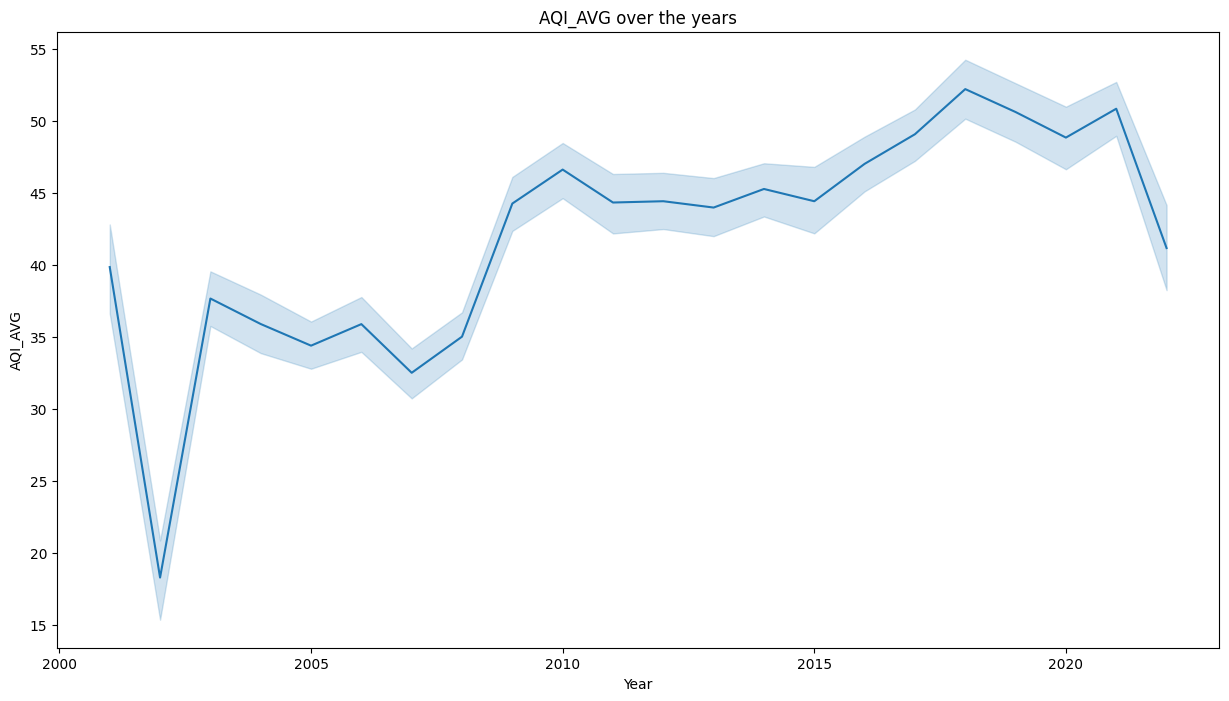

In [22]:
# plot AQI_AVG over the years
plt.figure(figsize=(15,8))
sns.lineplot(x=df1['Year'],y=df1['AQI_AVG'])
plt.title('AQI_AVG over the years')
plt.show()

In [23]:
# group by year and month and calculate the sum of all pollutants
df2 = df1.copy()
df2.drop(['AQI_AVG','AQI_PM10','AQI_PM25','AQI_NO2','AQI_O3','AQI_CO','AQI_category'],axis=1,inplace=True)
df2 = df2.groupby(['Year','Month']).sum()

df2.drop(['Day'],axis=1,inplace=True)

df2.groupby(['Year']).sum()

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
Year,,,,,,,,,,,,,,
2001,0.0,75.0,0.0,34.700000,0.0,1104.386580,2811.505736,4505.333874,2884.107251,1166.341342,600.000000,483.635714,75.0,248.651190
2002,0.0,43.0,0.0,0.000000,0.0,2073.374922,2468.083724,5646.051701,742.460200,817.205948,344.000000,484.193362,43.0,86.000000
2003,0.0,352.0,0.0,128.532697,0.0,11920.042228,21390.676411,39668.312940,12717.255573,7934.485971,2816.000000,3790.000747,352.0,1445.381525
2004,0.0,353.0,0.0,237.046664,0.0,12023.920198,21618.377656,40051.302363,12145.608595,7277.284330,2824.000000,3131.781288,353.0,1917.626406
2005,0.0,355.0,0.0,222.098798,0.0,11739.864550,22990.198186,40982.817998,11682.802766,7889.220070,2840.000000,3180.654073,355.0,740.516009
2006,0.0,328.0,0.0,76.642333,0.0,11732.782923,20890.608375,38875.475115,11265.173700,9879.552290,2624.000000,3017.692256,328.0,880.742218
2007,0.0,357.0,0.0,250.230632,0.0,11977.750814,21108.567483,39481.221846,11102.586152,9092.954014,2856.000000,3508.927723,357.0,1300.729679
2008,0.0,360.0,0.0,174.003195,0.0,9641.938294,20251.733250,35065.295809,12089.317933,7931.120162,2880.000000,3538.858059,360.0,1314.114030
2009,0.0,363.0,0.0,168.859744,0.0,9217.870943,17309.072707,31442.504367,15486.205430,7094.863614,3207.968698,3703.886229,363.0,1225.938445


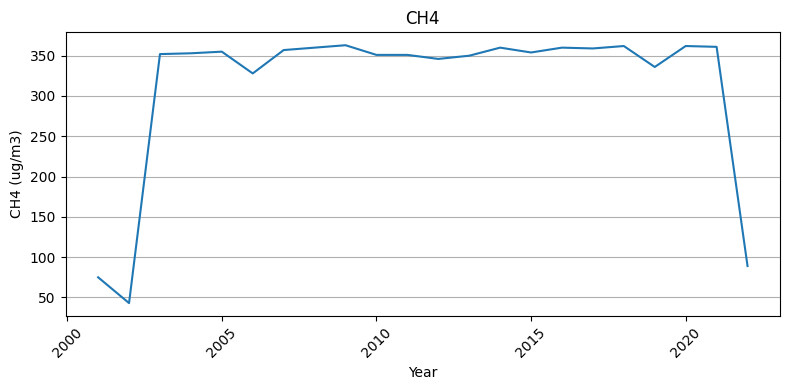

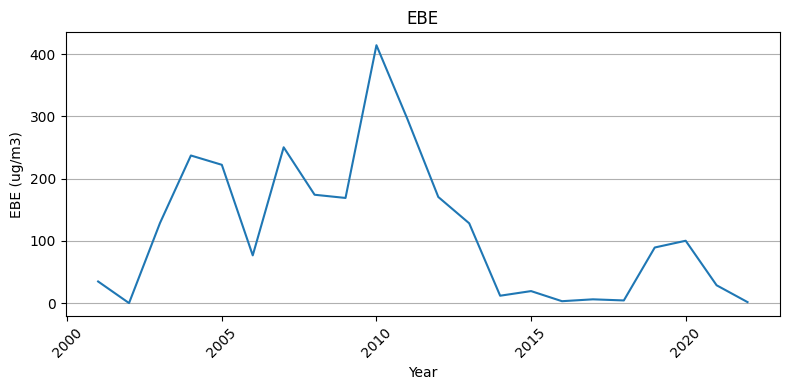

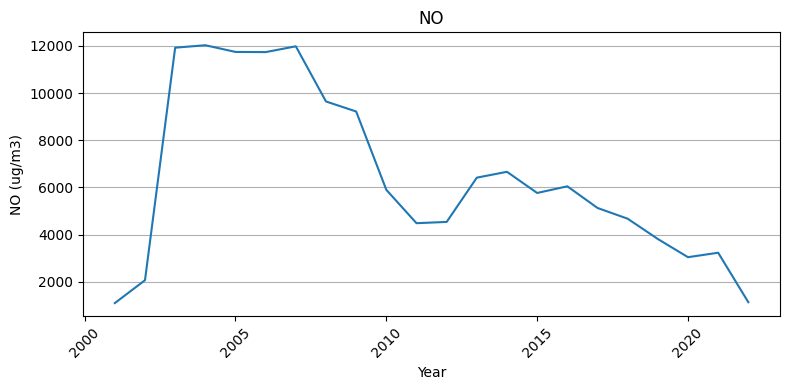

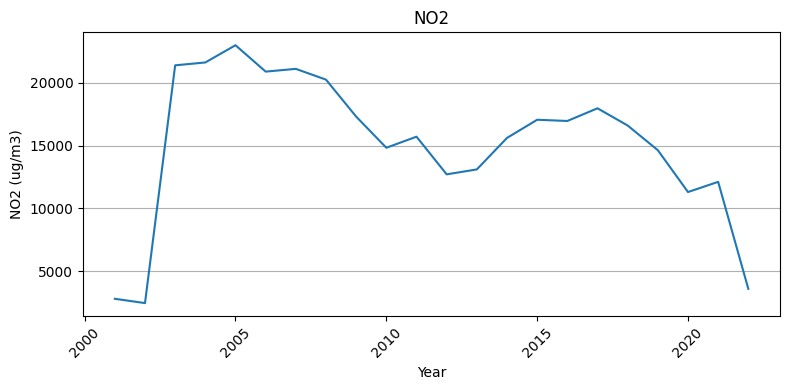

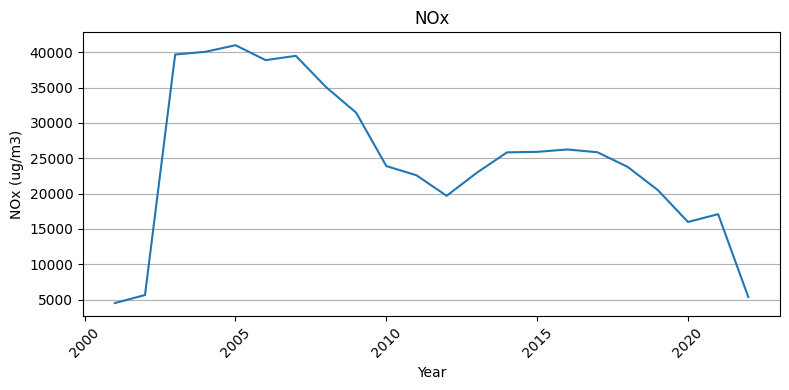

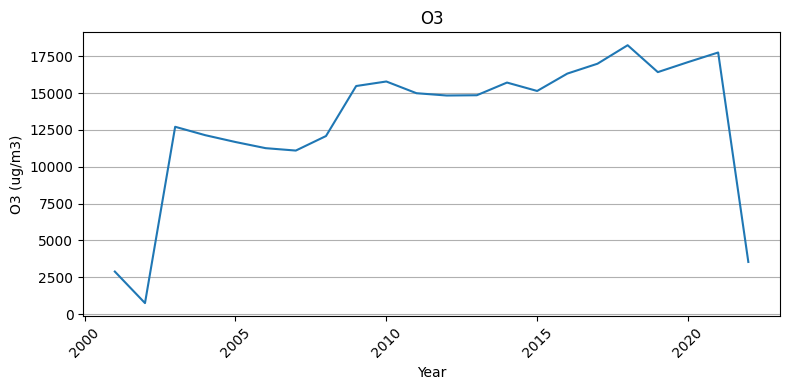

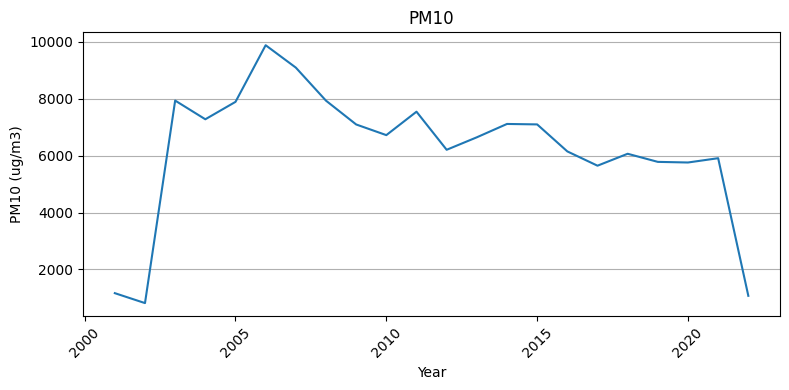

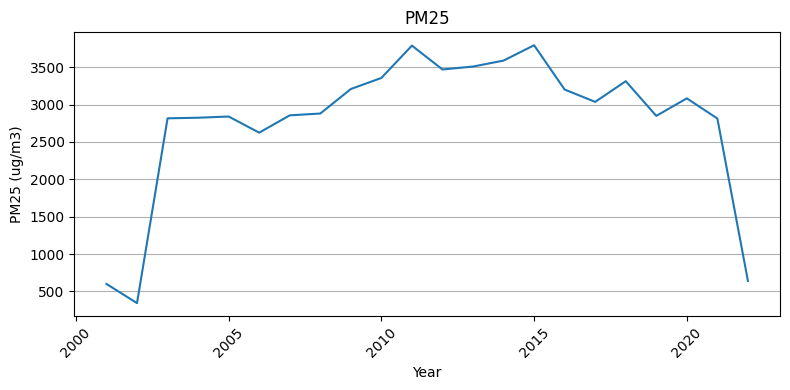

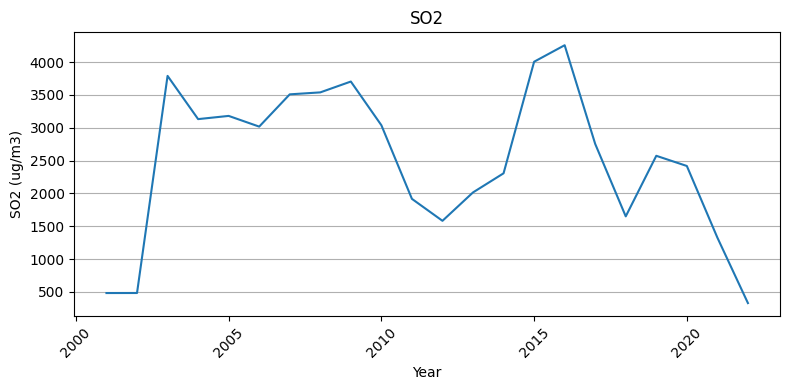

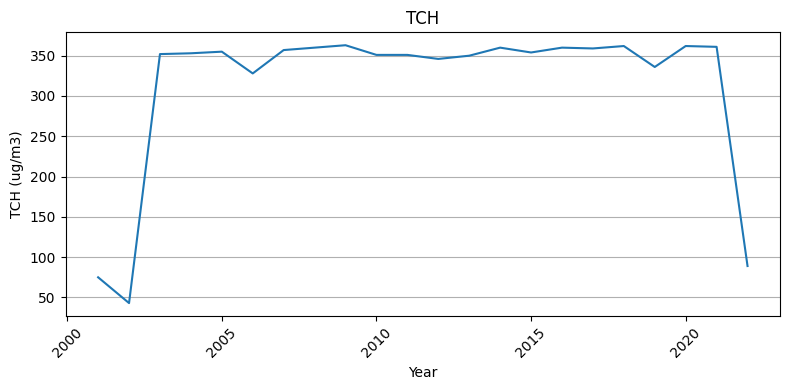

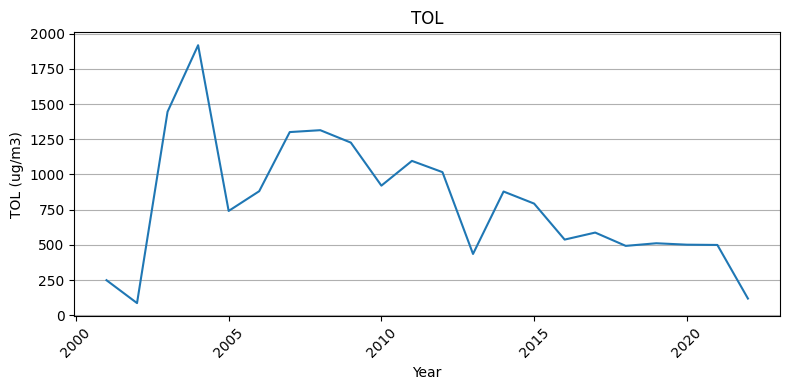

In [24]:
# plot all pollutants by year
def plot(df, title):
    ax = df.groupby(['Year']).sum().plot(figsize=(8, 4), legend=False, fontsize=10)
    ax.set_title(title)
    ax.set_ylabel(df.name + ' (ug/m3)')
    ax.set_xlabel('Year')
    ax.grid(axis='y')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

charts = ['CH4','EBE','NO','NO2','NOx','O3','PM10','PM25','SO2','TCH','TOL']

# display specific pollutants by year 
for i in charts:
    df2.name = i
    plot(df2[i], i)


In [25]:
# feature engineering
df3 = df1.copy()
df3.drop(['AQI_PM10','AQI_PM25','AQI_NO2','AQI_O3','AQI_CO','AQI_AVG','Day'],axis=1,inplace=True)

# convert categorical columns to numerical columns using rank encoding
df3['Month'] = df3['Month'].astype('category')

df3['Month'] = df3['Month'].cat.codes

df3['Year'] = df3['Year'].astype('category')

df3['Year'] = df3['Year'].cat.codes

df3['AQI_category'] = df3['AQI_category'].astype('category')

df3['AQI_category'] = df3['AQI_category'].cat.codes

In [26]:
df3.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,4,0,1
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,4,0,0
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,4,0,1
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,4,0,0
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,4,0,0
5,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,8.0,4.000000,1.0,3.000000,4,0,0
6,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,8.0,17.500000,1.0,3.000000,4,0,0
7,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,8.0,16.333333,1.0,3.000000,4,0,0
8,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,8.0,5.000000,1.0,3.000000,4,0,0
9,0.0,1.0,0.0,0.5,0.0,10.750000,18.750000,34.500000,30.750000,6.000000,8.0,7.250000,1.0,2.000000,4,0,0


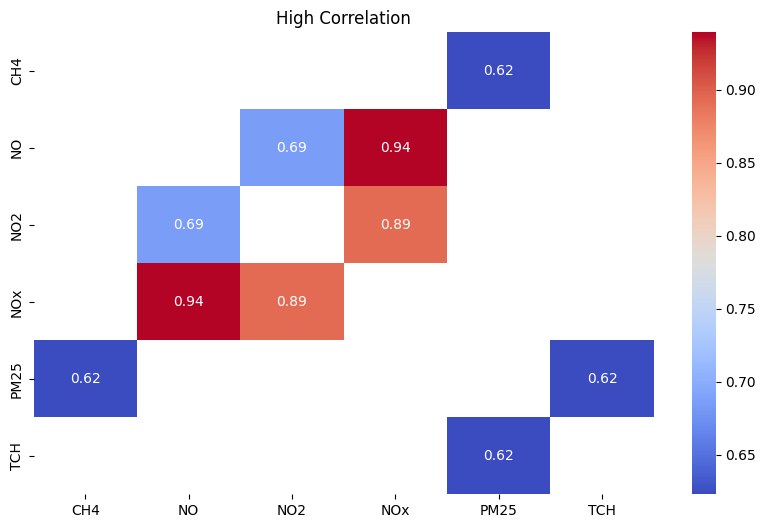

In [27]:
# function to extract high correlated columns
def get_high_corr(df, threshold):
    corr = df.corr()
    high_corr = corr[((corr >= threshold) | (corr <= -threshold)) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

# get high correlated columns
high_corr = get_high_corr(df2, 0.6)

# plot high correlated columns
plt.figure(figsize=(10, 6))
plot = sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Correlation')
plt.show()

In [28]:
df3.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,4,0,1
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,4,0,0
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,4,0,1
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,4,0,0
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,4,0,0
5,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,8.0,4.000000,1.0,3.000000,4,0,0
6,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,8.0,17.500000,1.0,3.000000,4,0,0
7,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,8.0,16.333333,1.0,3.000000,4,0,0
8,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,8.0,5.000000,1.0,3.000000,4,0,0
9,0.0,1.0,0.0,0.5,0.0,10.750000,18.750000,34.500000,30.750000,6.000000,8.0,7.250000,1.0,2.000000,4,0,0


In [30]:
df3.isnull().sum()

BEN             0
CH4             0
CO              0
EBE             0
NMHC            0
NO              0
NO2             0
NOx             0
O3              0
PM10            0
PM25            0
SO2             0
TCH             0
TOL             0
Month           0
Year            0
AQI_category    0
dtype: int64

In [31]:
df3.shape

(6927, 17)

In [32]:
df3.describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
count,6927.0,6927.0,6927.0,6927.000000,6927.0,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.0,6927.000000,6927.000000,6927.000000,6927.000000
mean,0.0,1.0,0.0,0.370246,0.0,20.544889,48.082697,79.587330,41.563510,19.746569,8.868612,7.942551,1.0,2.532670,5.531543,10.979645,0.786632
std,0.0,0.0,0.0,0.458048,0.0,14.944931,15.638697,35.412983,18.991506,10.203481,3.198700,4.002903,0.0,1.914285,3.429603,5.685751,0.646482
min,0.0,1.0,0.0,0.000000,0.0,1.000000,7.250000,8.708333,0.285714,2.500000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.0,0.000000,0.0,9.906926,37.333333,55.000000,27.146429,11.833333,7.875000,4.909091,1.0,1.142857,3.000000,6.000000,0.000000
50%,0.0,1.0,0.0,0.157895,0.0,16.826087,47.157895,73.388889,41.727273,17.750000,8.000000,7.380952,1.0,2.000000,6.000000,11.000000,1.000000
75%,0.0,1.0,0.0,0.666667,0.0,27.181985,57.784722,98.666667,56.087121,26.058824,9.872283,10.411765,1.0,3.416667,8.000000,16.000000,1.000000
max,0.0,1.0,0.0,2.000000,0.0,107.000000,120.550000,278.000000,95.272727,65.800000,28.000000,22.000000,1.0,11.000000,11.000000,21.000000,3.000000


In [29]:
# save the cleaned dataset
df3.to_csv('MadridPolution2001-2022_cleaned.csv', index=False)